 # Exercice 1 : Decision Trees and Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

In [3]:
random_state = 42
data = pd.read_csv('../data/colon_cancer.csv', sep=';', index_col='id_sample')
y = data['tissue_status']

## Question 1. Construire la matrice **X** avec toutes les variables disponibles dans le dataset

Indice : vous pouvez utiliser la méthode `select_dtypes('number')` ou la méthode `drop(columns=['tissue_status'])`

In [4]:
# X = data... # à compléter
X = data.select_dtypes('number')

## Question 2. Créer un dataset d'entrainement de 3/4 et un dataset de test de 1/4

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=..., random_state=random_state, stratify=y) # test_size à compléter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=random_state, stratify=y)

Quelles sont les dimensions des matrices X_train et X_test ? Combien d'échantillons contient chaque dataset ?

Indice : On peut utiliser l'attribut `shape` du dataframe.

In [6]:
# print('Train:', X_train..., 'Test:', X_test...) # à compléter
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (603, 60) Test: (201, 60)


## Question 3. Créer, entrainer et visualiser un arbre de décision (decision tree) de profondeur 2 pour la totalité des gènes

In [7]:
classifier = DecisionTreeClassifier(max_depth=2, random_state=random_state, criterion='entropy')
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train, X_test, y_train, y_test)

Train accuracy: 1.000 Test accuracy: 0.975


[Text(167.4, 181.2, 'UGP2 <= 5.72\nentropy = 1.0\nsamples = 603\nvalue = [301, 302]\nclass = tumoral'),
 Text(83.7, 108.72, 'DHRS11 <= 5.33\nentropy = 0.19\nsamples = 309\nvalue = [9, 300]\nclass = tumoral'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 300\nvalue = [0, 300]\nclass = tumoral'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = normal'),
 Text(251.10000000000002, 108.72, 'RNF43 <= 4.72\nentropy = 0.06\nsamples = 294\nvalue = [292, 2]\nclass = normal'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 292\nvalue = [292, 0]\nclass = normal'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = tumoral')]

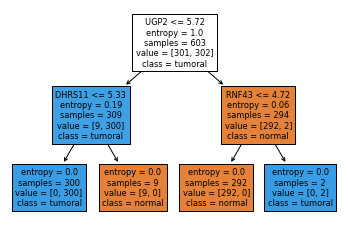

In [8]:
# plot_tree(..., feature_names=...,  class_names=y.unique(), precision=2, filled=True) # options à compléter
plot_tree(trained_classifier, feature_names=list(X_train.columns),  class_names=y.unique(), precision=2, filled=True)

Quels sont les meilleurs gènes prédicteurs indentifiés par l'algorithme ?

## Question 4. Calculer la matrice de confusion

La **matrice de confusion** est une matrice qui mesure la qualité d'un système de classification. Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée. La cellule ligne L, colonne C contient le nombre d'éléments de la classe réelle L qui ont été estimés comme appartenant à la classe C. Un des intérêts de la matrice de confusion est qu'elle montre rapidement si un système de classification parvient à classifier correctement.

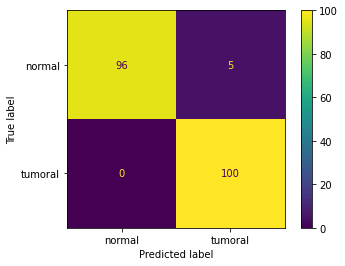

In [9]:
metrics.plot_confusion_matrix(trained_classifier, X_test, y_test)  

Est-ce que le modèle prédit aussi bien les échantillons normaux que tumoraux ?

## Question 5. Créer un modèle de Random Forest avec 20 arbres et estimer ses métriques

La méthode de Random Forest crée une série d'arbres de décsion (une forêt). Chaque arbre prend en compte une partie des features tirés au hasard. La résultat final est établi par un vote entre tous les arbres (la majorité gagne). Pour entrainer un modèle de Random Forest, utilisez la classe **RandomForestClassifier** de **scikit-learn**. La profondeur de chaque arbre est définie par l'option *max_depth*. Le nombre total d'arbres dans la forêt est controlé par l'option *n_estimators*.

Train accuracy: 0.998 Test accuracy: 0.995


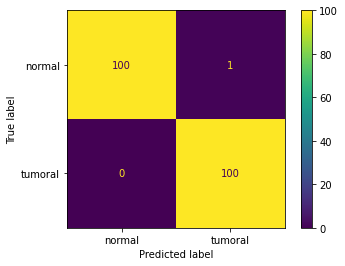

In [10]:
# classifier = RandomForestClassifier(max_depth=2, n_estimators=..., random_state=random_state, criterion='entropy') # n_estimators à compléter
classifier = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=random_state, criterion='entropy')
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train, X_test, y_train, y_test)
metrics.plot_confusion_matrix(trained_classifier, X_test, y_test)

Quel modèle est plus performant : Decision Tree ou Random Forest ?

## Question 6. Quelles autres métriques peuvent être utilisées pour un problème de classification ?

Pour répondre à cette question, regardez les métriques standards proposées dans **scikit-learn** : https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Afficher la courbe ROC pour le modèle de Random Forest.

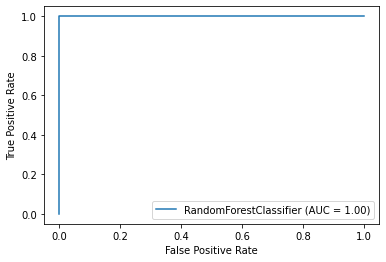

In [11]:
# metrics.plot_roc_curve(estimator=..., X=..., y=...) # options à compléter  
metrics.plot_roc_curve(estimator=trained_classifier, X=X_test, y=y_test)  

Afficher un rapport avec plusieurs métriques pour le modèle de Random Forest.

In [12]:
# report = metrics.classification_report(y_true=..., y_pred=..., target_names=y.unique()) # options à compléter
y_pred_test = classifier.predict(X_test)
report = metrics.classification_report(y_true=y_test, y_pred=y_pred_test, target_names=y.unique())
print(report)

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00       101
     tumoral       0.99      1.00      1.00       100

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

